# Yahtzee in Python

## Rules of Yahtzee (simplified)

Roll five dice, and re-roll some of them until you get a Yahtzee, meaning that all five dice show the same number.

* __Roll five dice.__ Suppose we get 1, 2, 1, 3, 1.
* __Keep the value that occur the most.__ In our example, we have three 1s. 
* __Re-roll the other dice.__ In this case, we re-roll the two dice that were not 1s. Suppose we get 1 and 4.
* __Add to the current Yahtzee.__ In our example, we have 1,1,1,1,4. Re-roll the die that isn't a 1 until it shows a 1.

## Question

**We would like to find out the average number of rolls until a Yahtzee appears.**

Let's use a simulation to find out!

## Simulating Yahtzee

We need to simulate rolling a die. We will use the **randint** function, which is found in the **random** module.

In [3]:
import random
random.randint(1,6)

4

Now we will write a function to roll $n$ dice.

In [0]:
def rollDice(n):
  rolls = []
  for i in range(n):
    rolls.append(random.randint(1,6))
  return rolls

Note that the running the code above doesn't produce any output, it just stores our function in memory. Now we can try out our function to roll 5 dice:


In [42]:
currRolls = rollDice(5)
print(currRolls)

[6, 6, 5, 1, 4]


We need to count the number of matches. To do this, we will count the number of 1s, 2s, ..., 6s that appear in **currRolls**. We will store these counts into a new list called **matches**.


In [43]:
matches = []
for i in range(1,7):
  matches.append(currRolls.count(i))
print(matches)

[1, 0, 0, 1, 1, 2]


Now we need to find the largest number in our list **matches**, which we can do using the **max()** function. This tells us how many times the most common roll appears.

In [32]:
maxMatch = max(matches)
print(maxMatch)

3


Next we need to find out which number on the dice was the most common roll. We can do this using the **index()** function. Don't forget that Python list indexes start at 0!

In [34]:
matchValue = matches.index(maxMatch) + 1
print(matchValue)

3


**Question**: Suppose that the maximum entry in **matches** occurs twice. (For example, maybe the dice rolled two 3s and two 5s.) What number will be stored in **matchValue**?

Now we must remove all non-match dice. The easiest way to do this is to reconstruct **currRolls** to contain **maxMatch** entries, each of which is **matchValue**.

In [36]:
currRolls = [matchValue for i in range(maxMatch)]
print(currRolls)

[3, 3, 3]


If we don't have a Yahtzee yet, then re-roll the other dice:

In [38]:
currRolls = currRolls + rollDice(5 - len(currRolls)) # this is a "list comprehension" in Python
print(currRolls)

[3, 3, 3, 5, 4]


At this point, we want to again count the number of matches. We could re-run the line of code above that does that. However, a more elegant solution is to write a loop that rolls the dice, counts mathces, and re-rolls as many times as necessary until all five dice show the same number. We will put this loop in a function, so we can run it easily. The function will return the number of rolls.

In [0]:
def rollYahtzee():
  # define some variables that we will need
  numRolls = 0
  currRolls = []
  
  # roll until all five dice show the same value
  while(len(currRolls) < 5):
    # roll the dice
    numRolls += 1
    currRolls = currRolls + rollDice(5 - len(currRolls))
    
    #print(currRolls) # printing the current rolls will help us verify that the function works properly
    
    # count the number of matches
    matches = []
    for i in range(1,7):
      matches.append(currRolls.count(i))
      
    # find the number of times the most common roll appears
    maxMatch = max(matches)
    
    # find the number shown on the most common roll
    matchValue = matches.index(maxMatch) + 1
    
    # remove all non-matched dice
    currRolls = [matchValue for i in range(maxMatch)]
    
  # now we have a Yahtzee
  return numRolls

Try out our function:

In [40]:
rollYahtzee()

10

## Some Statistics on Yahtzee

Simulate Yahtzee many times and record how many rolls it takes. *Before running the following code, comment out the **print** statement in **rollYahtzee**!*

Here is a clever way to make a list of return values of the `rollYahtzee` function using a list comprehension:

In [24]:
n=1000
numRollList = [rollYahtzee() for _ in range(n)] # list comprehension 

print(numRollList)

[11, 28, 10, 12, 7, 13, 15, 2, 13, 3, 23, 8, 6, 15, 7, 19, 7, 14, 15, 12, 15, 10, 8, 8, 8, 11, 3, 9, 15, 16, 12, 6, 4, 22, 5, 12, 29, 12, 7, 17, 7, 27, 13, 6, 5, 13, 22, 10, 13, 19, 16, 10, 14, 10, 15, 13, 5, 14, 16, 3, 13, 11, 6, 7, 20, 4, 16, 5, 4, 7, 27, 15, 14, 27, 9, 7, 12, 9, 13, 5, 9, 7, 14, 9, 15, 4, 11, 6, 13, 6, 27, 22, 20, 23, 6, 23, 8, 14, 13, 6, 4, 15, 6, 7, 8, 2, 14, 9, 27, 7, 10, 9, 5, 13, 21, 4, 17, 14, 21, 8, 10, 9, 8, 7, 12, 5, 11, 10, 12, 13, 7, 9, 29, 6, 11, 8, 5, 5, 8, 6, 4, 12, 23, 12, 7, 7, 13, 7, 2, 15, 11, 10, 13, 9, 5, 9, 13, 18, 5, 3, 23, 14, 15, 23, 9, 6, 4, 11, 8, 7, 17, 11, 7, 19, 5, 4, 7, 17, 17, 4, 11, 12, 8, 3, 5, 10, 9, 9, 4, 9, 8, 7, 8, 7, 12, 4, 13, 6, 9, 11, 3, 10, 13, 10, 6, 8, 9, 3, 20, 7, 14, 12, 3, 18, 13, 10, 7, 5, 14, 13, 11, 12, 6, 6, 7, 20, 15, 23, 4, 15, 18, 10, 17, 4, 6, 6, 26, 4, 15, 7, 28, 9, 4, 11, 8, 12, 4, 21, 9, 20, 10, 10, 12, 15, 10, 3, 16, 13, 5, 26, 10, 8, 12, 9, 22, 19, 9, 11, 14, 12, 12, 7, 14, 10, 11, 15, 11, 11, 11, 11, 11, 4

In [25]:
[x**2 for x in range(10)]

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

### What is the mean number of rolls? 

To easily answer this question, we will use the **mean()** function in the NumPy module.

In [27]:
import numpy
numpy.mean(numRollList)

11.108

### What proportion of the time do you get Yahtzee in three or fewer rolls?

NumPy provides a nice way to do this:

In [0]:
nums = numpy.array(numRollList) # convert a list to array # compare each number in a list to 3
# Print(nums)
#print(nums <= 3) #only return True/False, compare to 3
sum(nums <= 3)/n     #True=1, False=0, this is why we could use the sum function

0.039

*Can you explain why the code above gives the proportion of times that you get Yahtzee in three or fewer rolls?*

## More Questions to Investigate

Now investigate some of the following questions.

### 1. What are the relative fequencies of the different numbers of rolls until all dice show the same number?

Make a histogram of the number of rolls before all dice show the same number.

Text(0, 0.5, 'frequency')

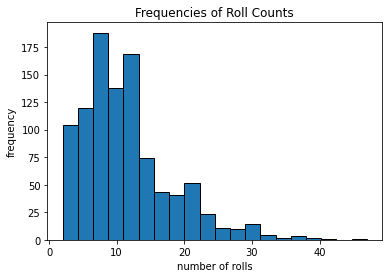

In [28]:
n=1000
numRollList = [rollYahtzee() for _ in range(n)]

import matplotlib.pyplot as plt # so can use pyplot later on 

plt.hist(numRollList, bins=20, alpha=1, linewidth=1, edgecolor='black')
plt.title("Frequencies of Roll Counts")
plt.xlabel("number of rolls")
plt.ylabel("frequency")

### 2. How often does each number 1, 2, 3, 4, 5, 6 appear as the most common number?

It is probably 1/6? Maybe not, because sometimes there are two pairs of matched die, and the simulation chooses one of these to keep and the other to re-roll. Make a histogram of how often each number appears as the matched value.

We have to modify our function to return the matched value, rather than the number of rolls:

In [0]:
def rollYahtzee2():
  # define some variables that we will need
  numRolls = 0
  currRolls = []
  
  # roll until all five dice show the same value
  while(len(currRolls) < 5):
    # roll the dice
    numRolls += 1
    currRolls = currRolls + rollDice(5 - len(currRolls))
        
    # count the number of matches
    matches = []
    for i in range(1,7):
      matches.append(currRolls.count(i))
      
    maxMatch = max(matches) # number of times the most common roll appears
    matchValue = matches.index(maxMatch) + 1 # number shown on the most common roll
    
    # remove all non-matched dice
    currRolls = [matchValue for i in range(maxMatch)]
    
  # now we have a Yahtzee
  return currRolls[1]

Now we can make a histogram:

Text(0, 0.5, 'frequency')

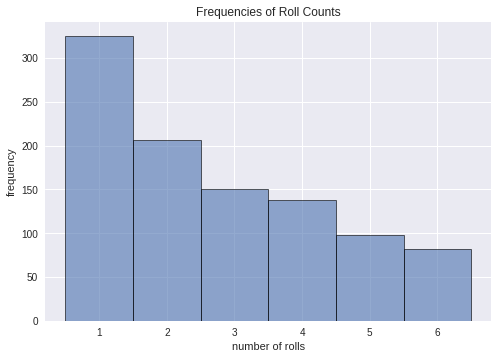

In [0]:
n=1000
values = [rollYahtzee2() for _ in range(n)]

import matplotlib.pyplot as plt

plt.hist(values, bins=6, range=(.5,6.5), alpha=0.6, linewidth=1, edgecolor='black')
plt.title("Frequencies of Roll Counts")
plt.xlabel("number of rolls")
plt.ylabel("frequency")

### 3. What happens if you change the game to use $n$ dice instead of 5?

Make a plot showing the average number of rolls as a function of $n$.

Again, we must modify our function to replace 5 with $n$:

In [0]:
def rollYahtzee3(n):
  # define some variables that we will need
  numRolls = 0
  currRolls = []
  
  # roll until all n dice show the same value
  while(len(currRolls) < n):
    # roll the dice
    numRolls += 1
    currRolls = currRolls + rollDice(n - len(currRolls))
        
    # count the number of matches
    matches = []
    for i in range(1,7):
      matches.append(currRolls.count(i))
      
    maxMatch = max(matches) # number of times the most common roll appears
    matchValue = matches.index(maxMatch) + 1 # number shown on the most common roll
    
    # remove all non-matched dice
    currRolls = [matchValue for i in range(maxMatch)]
    
  # now we have a Yahtzee
  return numRolls

# a little function to return the average number of rolls for a given n
import numpy
def averageRolls3(n):
  numRollList = [rollYahtzee3(n) for _ in range(1000)]
  return numpy.mean(numRollList)

Now compute the average number of rolls for various $n$:

In [0]:
values = [averageRolls3(n) for n in range(2,15)]
print(values)

[6.12, 8.04, 9.517, 11.028, 12.153, 12.798, 14.053, 14.488, 15.372, 15.403, 16.166, 16.859, 17.378]


Text(0, 0.5, 'average number of rolls')

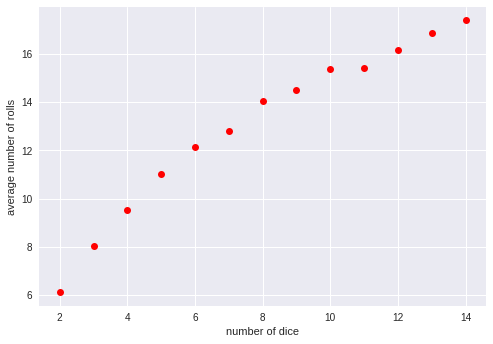

In [0]:
plt.plot(range(2,15),values,'ro') # ro means red circles 
plt.xlabel("number of dice")
plt.ylabel("average number of rolls")

### 4. What happens if you change the game to use $k$-sided dice instead of 6-sided dice?

Make a plot showing the average number of rolls as a function of $k$.

We modify our function once more, this time replacing 6 with $k$.

In [0]:
def rollDice4(n,k):
  rolls = []
  for i in range(n):
    rolls.append(random.randint(1,k))
  return rolls

def rollYahtzee4(k):
  # define some variables that we will need
  numRolls = 0
  currRolls = []
  
  # roll until all five dice show the same value
  while(len(currRolls) < 5):
    # roll the dice
    numRolls += 1
    currRolls = currRolls + rollDice4(5 - len(currRolls),k)
        
    # count the number of matches
    matches = []
    for i in range(1,k+1):
      matches.append(currRolls.count(i))
      
    maxMatch = max(matches) # number of times the most common roll appears
    matchValue = matches.index(maxMatch) + 1 # number shown on the most common roll
    
    # remove all non-matched dice
    currRolls = [matchValue for i in range(maxMatch)]
    
  # now we have a Yahtzee
  return numRolls

# a little function to return the average number of rolls for a given k
import numpy
def averageRolls4(k):
  numRollList = [rollYahtzee4(k) for _ in range(1000)]
  return numpy.mean(numRollList)

In [0]:
values = [averageRolls4(k) for k in range(2,16)]
print(values)

[3.374, 5.126, 7.282, 8.932, 11.32, 12.898, 14.868, 16.428, 19.169, 20.461, 22.525, 25.149, 25.748, 28.823]


Text(0, 0.5, 'average number of rolls')

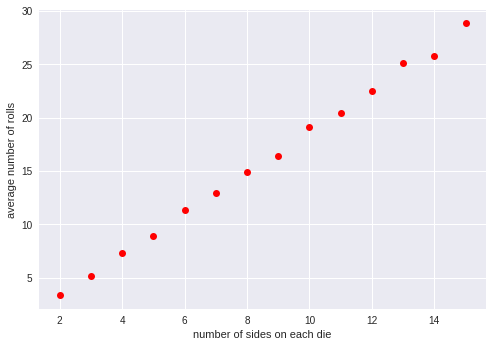

In [0]:
plt.plot(range(2,16),values,'ro')
plt.xlabel("number of sides on each die")
plt.ylabel("average number of rolls")